## Chapter-3 Classification

## Mnist

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [3]:
y.shape

(70000,)

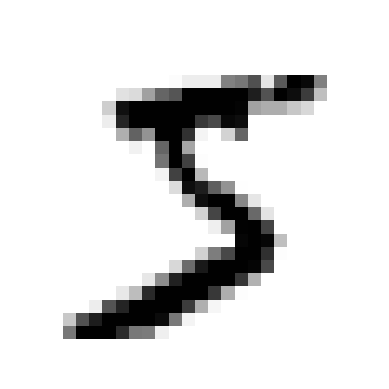

In [4]:
import matplotlib as mpl 
import matplotlib.pyplot as plt

some_digit = X.to_numpy()[0]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [5]:
y.to_numpy()[0]

'5'

In [6]:
import numpy as np
y= y.astype(np.uint8)

In [7]:
X_train, X_test, y_train, y_test = X.to_numpy()[:60000],X.to_numpy()[60000:], y.to_numpy()[:60000], y.to_numpy()[60000:]

In [8]:
y_train_5 = (y_train==5)
y_test_5 = (y_test==5)
y_train_5


array([ True, False, False, ...,  True, False, False])

In [9]:
from sklearn.linear_model import SGDClassifier

sgd_classifier = SGDClassifier(random_state=42)
sgd_classifier.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [10]:
sgd_classifier.predict([some_digit])

array([ True])

In [11]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_classifier = clone(sgd_classifier)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_classifier.fit(X_train_folds, y_train_folds)

    y_pred = clone_classifier.predict(X_test_fold)
    n_correct = sum(y_pred==y_test_fold)
    print(n_correct/len(y_pred))


0.9669
0.91625
0.96785


In [12]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_classifier, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [13]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self 
    def predict(self, X):
        return np.zeros((len(X),1), dtype=bool)

In [14]:
never_5_classifier = Never5Classifier()
cross_val_score(never_5_classifier, X_train,y_train_5,cv=3, scoring="accuracy")


array([0.91125, 0.90855, 0.90915])

### Confusion Matrix

In [15]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_classifier, X_train, y_train_5, cv=3)
y_train_pred

array([ True, False, False, ...,  True, False, False])

In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [17]:
y_train_perferct_predictions = y_train_5 #pretend we reached perfection
confusion_matrix(y_train_5,y_train_perferct_predictions)

array([[54579,     0],
       [    0,  5421]])

### Precision and Recall

In [18]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred) # ==3530/(3530+687) ----> TP/(TP+FP)


0.8370879772350012

In [19]:
recall_score(y_train_5, y_train_pred) # ==3530/(3530+1891) ----> TP/(TP+FN)

0.6511713705958311

In [20]:
"""

 F1 = 2/((1/precision)+ (1/recall) ==> 2 * {(precision*recall)/(precision+recall)}


 -----> == TP/TP + (((FN+FP)/2))
 
 """

'\n\n F1 = 2/((1/precision)+ (1/recall) ==> 2 * {(precision*recall)/(precision+recall)}\n\n\n -----> == TP/TP + (((FN+FP)/2))\n \n '

In [21]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [22]:
y_scores = sgd_classifier.decision_function([some_digit])
y_scores

array([2164.22030239])

In [23]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [24]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [25]:
y_scores = cross_val_predict(sgd_classifier, X_train, y_train_5, cv=3, method = "decision_function")

In [26]:
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [27]:
from sklearn.metrics import precision_recall_curve
precision, recall, threshold = precision_recall_curve(y_train_5, y_scores)

In [28]:
import matplotlib as mp
import matplotlib.pyplot as plt


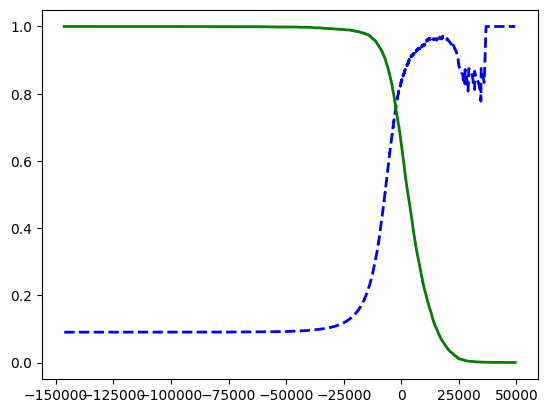

In [29]:
def plot_precision_recall_vs_threshold(precision, recall, threshold):
    plt.plot(threshold,precision[:-1],"b--", label="precision", linewidth=2)
    plt.plot(threshold,recall[:-1],"g-", label="recall", linewidth=2)

plot_precision_recall_vs_threshold(precision, recall, threshold)
plt.show()

In [30]:
import numpy as np
threshold_90_precision = threshold[np.argmax(precision>0.90)]

In [31]:
y_train_pred_90 = (y_scores>=threshold_90_precision)
y_train_pred_90

array([False, False, False, ...,  True, False, False])

In [32]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [33]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

In [35]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train>=7)
y_train_odd = (y_train%2==1)
y_multilabel = np.c_[y_train_large,y_train_odd]

In [36]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [37]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [38]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.976410265560605

## Multi output Classification

In [43]:
noise_train = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise_train
noise_test = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise_test
y_train_mod = X_train
y_test_mod = X_test


In [53]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[0]])
plot_digit(clean_digit)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=17d2748e-c8ac-4922-b92b-a46154c07520' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>